In [1]:
import pathlib
import os
import pandas as pd

## Data Loading

In [2]:
articles_path = "/Users/a1/Desktop/News/dataset/News Articles/"
summaries_path = "/Users/a1/Desktop/News/dataset/Summaries/"
articles_dir = pathlib.Path(articles_path)
summaries_dir = pathlib.Path(summaries_path)

In [3]:
articles_pathlist = list(articles_dir.iterdir())
summaries_pathlist = list(summaries_dir.iterdir())

In [4]:
def generate_data(folder):
    data = []
    count = 0
    for file in os.listdir(folder):
        try:
            text = ''
            name = file
            myfile = open(str(folder) + '/' + file, "r")
            text = myfile.read()
            #mylist = [name, text]
            count += 1
            data.append(text)
        except:
            continue
    print("Task Finished!")
    print(str(count) + " text files")
    
    return data, count

In [5]:
articles = []
summaries = []

for e in articles_pathlist:
    data, count = generate_data(e)
    articles.extend(data)

for e in summaries_pathlist:
    data, count = generate_data(e)
    summaries.extend(data)

Task Finished!
386 text files
Task Finished!
510 text files
Task Finished!
510 text files
Task Finished!
417 text files
Task Finished!
401 text files
Task Finished!
386 text files
Task Finished!
510 text files
Task Finished!
510 text files
Task Finished!
417 text files
Task Finished!
401 text files


In [6]:
print('Articles # : ' + str(len(articles)))
print('Summaries # : ' + str(len(summaries)))

Articles # : 2224
Summaries # : 2224


## Preprocessing and Tokenizing

In [7]:
import re

def preprocess_sentence(w):
    # Replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,]+", " ", w) 
    # Reducing spaces
    w = re.sub(r'[" "]+', " ", w)
    # lower case
    w = w.lower()
    return w

In [8]:
for i in range(len(articles)):
    articles[i] = preprocess_sentence(articles[i])
    
for i in range(len(summaries)):
    summaries[i] = preprocess_sentence(summaries[i])

In [12]:
raw_data = {'article' : articles,
            'summaries' : summaries}

In [13]:
data = pd.DataFrame(raw_data)
data

,article,summaries
0,musicians to tackle us red tape musicians grou...,nigel mccune from the musicians union said bri...
1,"u s desire to be number one u , who have won t...",but they still want more.they have to want to ...
2,rocker doherty in on stage fight rock singer p...,"babyshambles, which he formed after his acrimo..."
3,snicket tops us box office chart the film adap...,a series of unfortunate events also stars scot...
4,ocean s twelve raids box office ocean s twelve...,"ocean s twelve, the crime caper sequel starrin..."
...,...,...
2219,warning over windows word files writing a micr...,writing a microsoft word document can be a dan...
2220,fast lifts rise into record books two high spe...,the lifts take only seconds to whisk passenger...
2221,nintendo adds media playing to ds nintendo is ...,nintendo is releasing an adapter for its ds ha...
2222,fast moving phone viruses appear security firm...,the new strains of the cabir mobile phone viru...


In [14]:
# https://teddylee777.github.io/tensorflow/word2vec-%EA%B3%BC-keras%EC%9D%98-Embedding-layer-%ED%99%9C%EC%9A%A9%EB%B2%95
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

In [20]:
tokenizer.fit_on_texts(data['article'])
print(len(tokenizer.word_index))
text_sequence = tokenizer.texts_to_sequences(data['article'])

27904


<AxesSubplot:>

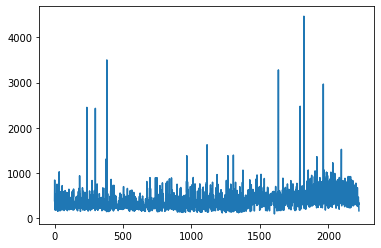

In [29]:
l = pd.Series(text_sequence).apply(len)
l.plot()

In [31]:
from keras.preprocessing.sequence import pad_sequences
max_length = 500
pad_text = pad_sequences(text_sequence, 
                         maxlen=max_length, 
                         truncating='post', 
                         padding='post')

In [33]:
pad_text[:5]

array([[ 2351,     2,  1303, ...,     0,     0,     0],
       [ 1909,     7,  2131, ...,  1911,   344,    90],
       [18658,  3583,     6, ...,     0,     0,     0],
       [ 7899,  6364,    49, ...,     0,     0,     0],
       [ 3798,     7,  4899, ...,     0,     0,     0]], dtype=int32)

In [35]:
pad_text.shape

(2224, 500)

In [37]:
import tensorflow as tf
import tensorflow_hub as hub

embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
embedding_layer = hub.KerasLayer(embedding, input_shape=[],
                            dtype=tf.string, trainable=True)

In [45]:
type(pad_text[0])
pad_text[0].shape

(500,)

In [46]:
test_arr = pad_text[0]
test_arr = list(test_arr)

In [47]:
embedding_layer(test_arr)

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    [2351, 2, 1303, 49, 1259, 4512, 2351, 831, 25, 2, 1303, 49, 2443, 3102, 35, 25, 2173, 8, 18636, 166, 2174, 1426, 3, 9476, 477, 1, 4195, 5, 711, 1296, 2, 2097, 6, 1, 49, 56, 1089, 2, 343, 761, 8, 10603, 5, 2443, 831, 229, 1, 2351, 544, 25, 2063, 8, 34, 176, 2, 1, 3582, 213, 1558, 22, 166, 4895, 49, 2174, 25, 28, 1558, 17, 10604, 5102, 4, 5348, 67, 3265, 1, 78, 8, 5103, 5349, 3792, 12186, 27, 1, 2351, 544, 13, 166, 2351, 25, 5989, 810, 2, 39, 49, 4896, 5, 8583, 19, 2, 89, 5, 7322, 12, 39, 3103, 35, 9, 5, 557, 9477, 2, 1049, 2731, 108, 2351, 389, 4196, 3102, 58, 1908, 4, 2098, 61, 60, 89, 5, 2570, 12, 325, 557, 60, 976, 5, 168, 41, 819, 4, 5350, 1, 1121, 2, 379, 325, 586, 120, 31, 12186, 1, 49, 9, 1, 70, 7, 326, 100, 119, 35, 492, 417, 19, 2, 16, 480, 53, 1, 14415, 5348, 120, 31, 12186, 1, 377, 908, 9, 5351, 166, 2174, 27, 4513, 3685, 4, 1277, 6, 1, 49, 15, 118, 1, 2351, 544, 3932, 9, 90, 8584, 22, 1, 100, 3185, 2625, 14416, 46, 153, 166, 1082, 389, 34, 7890, 3025, 2, 2626, 6, 1, 49, 2231, 2, 1, 874, 2443, 4335, 35, 25, 45, 292, 18, 12187, 1, 14416, 7, 256, 335, 952, 5990, 13, 4061, 61, 60, 44, 34, 3793, 27, 1, 18637, 313, 909, 36, 20, 2, 1398, 2, 198, 2, 20, 39, 9478, 5991, 1, 49, 119, 9, 292, 18, 1, 6356, 8585, 4, 51, 3, 1, 18638, 3, 562, 4, 32, 240, 135, 132, 2, 797, 2, 92, 6, 52, 11, 7, 135, 98, 376, 24, 52, 25, 72, 875, 94, 228, 517, 4, 295, 118, 31, 5990, 5, 855, 8, 298, 1512, 4, 662, 1513, 13, 32, 240, 1619, 10, 47, 25, 5992, 465, 4, 25, 387, 17, 1, 49, 7323, 4, 217, 218, 2, 165, 75, 32, 56, 85, 53, 11, 5, 49, 7323, 266, 13, 32, 25, 1619, 10, 10605, 2865, 9478, 8, 68, 1884, 9478, 4, 25, 511, 838, 32, 56, 2, 856, 136, 2732, 18639, 32, 25, 1619, 3, 1, 2866, 3, 3362, 773, 4, 32, 23, 85, 124, 82, 2, 10606, 10, 15, 118, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
  input_signature: (
    TensorSpec(shape=(None,), dtype=tf.string, name=None))

In [48]:
reverse_word_map = dict(map(pad_text[0], tokenizer.word_index.items()))

TypeError: 'numpy.ndarray' object is not callable